In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = 'E:\\1. Lectures\\2. CPV301-Computer Vision\\3. Ipynb\\images\\girl.jpeg'
img = cv2.imread(img_path)
#cv2.imshow('original',img)
#cv2.waitKey()

In [ ]:
img

In [7]:
count = np.zeros(256)
count2 = np.zeros(256)
count3 = np.zeros(256)

In [8]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #print(img[i,j,0])
        count[img[i,j,0]]+=1
        count2[img[i,j,1]]+=1
        count3[img[i,j,2]]+=1

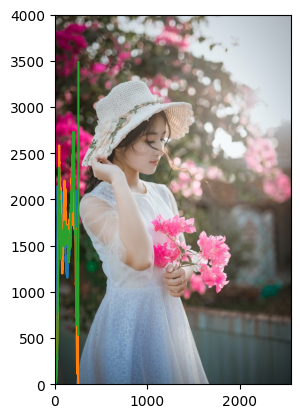

In [18]:
img2=plt.imread(img_path)
plt.imshow(img2,extent =[0,2555,0,4000])
plt.plot(count)
plt.plot(count2)
plt.plot(count3)

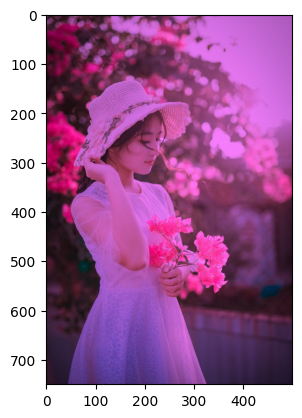

In [27]:
img3= img2.copy()
img3[:,:,1] = img3[:,:,1]/2
plt.imshow(img3)


In [29]:
img4 = cv2.imread('images/equalization.png',0)
cv2.imshow('original',img4)
cv2.waitKey()

-1

In [40]:
print(img4)

[[249 245 241 ... 240 240 241]
 [245 231 220 ... 220 219 220]
 [242 223 205 ... 206 203 205]
 ...
 [242 223 205 ... 197 199 203]
 [243 224 206 ... 205 203 205]
 [248 240 234 ... 234 234 234]]


In [10]:
def color_balance(image, r_balance, g_balance, b_balance):
    (B, G, R) = cv2.split(image)
    
    R = cv2.addWeighted(R, 1 + r_balance*0.05, 0, 0, 0)
    G = cv2.addWeighted(G, 1 + g_balance*0.05, 0, 0, 0)
    B = cv2.addWeighted(B, 1 + b_balance*0.05, 0, 0, 0)
    
    return cv2.merge([B, G, R])

def update_image(x):
    r_balance = cv2.getTrackbarPos('Red', 'Balanced Image') - 50
    g_balance = cv2.getTrackbarPos('Green', 'Balanced Image') - 50
    b_balance = cv2.getTrackbarPos('Blue', 'Balanced Image') - 50
    
    balanced_img = color_balance(img, r_balance, g_balance, b_balance)
    cv2.imshow('Balanced Image', balanced_img)

img = cv2.imread('images/cat.jpg')
cv2.namedWindow('Balanced Image')
cv2.imshow('Balanced Image', img)

cv2.createTrackbar('Red', 'Balanced Image', 50, 100, update_image)
cv2.createTrackbar('Green', 'Balanced Image', 50, 100, update_image)
cv2.createTrackbar('Blue', 'Balanced Image', 50, 100, update_image)

update_image(0)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [43]:
hist = cv2.calcHist([img4],[0],None,[256],[0,256])
plt.plot(hist)

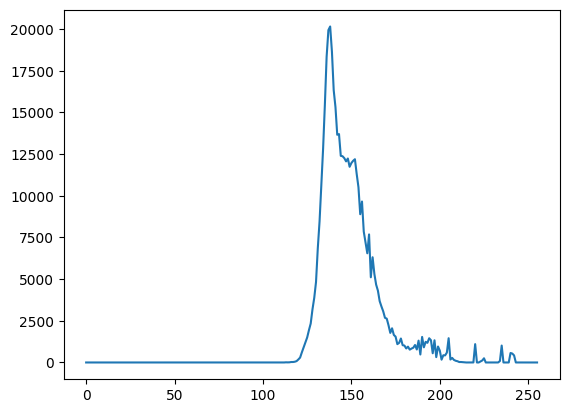

In [54]:
plt.plot(hist)

In [50]:
cumulater = np.zeros_like(hist,np.float64)
for i in range(len(cumulater)):
    cumulater[i] = hist[:i].sum()
new_hist  = (cumulater-cumulater.min())/(cumulater.max()-cumulater.min())*255

In [62]:
#plt.plot(cumulater)
#plt.plot(new_hist)

In [58]:
img_equal = img4.copy()

In [59]:
h,w = img4.shape
for i in range(h):
    for j in range(w):
        img_equal[i,j]= new_hist[img_equal[i,j]]
        

C:\Users\Admin\AppData\Local\Temp\ipykernel_13140\2924502032.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_equal[i,j]= new_hist[img_equal[i,j]]


In [61]:
cv2.imshow('original', img4)
cv2.imshow('equal', img_equal)
cv2.waitKey()

-1

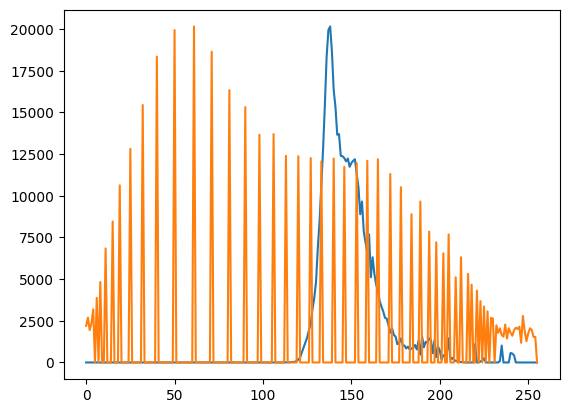

In [63]:
hist = cv2.calcHist([img4],[0],None,[256],[0,256])
hist_new = cv2.calcHist([img_equal],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(hist_new)

In [ ]:
# Filter

In [4]:
img5 = cv2.imread('images/Lady_grayscale_salt_pepper.png')
cv2.imshow('original',img5)
cv2.waitKey()

-1

In [8]:
kernel = np.ones((5,5))/25
blured_img = cv2.filter2D(img5,-1,kernel)
blured_img2 = cv2.blur(img5,(5,5))
blured_img3 = cv2.medianBlur(img5,5)
blured_img4 = cv2.medianBlur(img5,3)
blured_img4_gau = cv2.GaussianBlur(img5,(3,3,),0)

In [9]:
cv2.imshow('Original',img5)
cv2.imshow('blured_img',blured_img)
cv2.imshow('blured_img_median',blured_img3)
cv2.imshow('blured_img_median3',blured_img4)
cv2.imshow('blured_img_median3_gau',blured_img4_gau)
cv2.waitKey()

-1